In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout, Activation

In [4]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")
print(f"The shape of the train dataset is {train_df.shape}")
print(f"The shape of the test dataset is {test_df.shape}")

The shape of the train dataset is (8908, 16)
The shape of the test dataset is (3818, 15)


In [5]:
train_df.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [7]:
test_df.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3818 non-null   object 
 1   I/O Data Operations       3818 non-null   float64
 2    I/O Data Bytes           3818 non-null   float64
 3   Number of subprocesses    3818 non-null   float64
 4   Time on processor         3818 non-null   float64
 5   Disk Reading/sec          3818 non-null   float64
 6   Disc Writing/sec          3818 non-null   float64
 7   Bytes Sent/sent           3818 non-null   float64
 8   Received Bytes (HTTP)     3818 non-null   float64
 9   Network packets sent      3818 non-null   float64
 10  Network packets received  3818 non-null   float64
 11  Pages Read/sec            3818 non-null   float64
 12  Pages Input/sec           3818 non-null   float64
 13  Page Errors/sec           3818 non-null   float64
 14  Confirme

In [9]:
train_df.drop("Label", axis=1).describe()

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
count,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
mean,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192
std,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140
min,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942
25%,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134
50%,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826
75%,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542
max,1795.316255,4.677280e+06,51.000000,25.246148,1064.819285,831.503948,98097.784300,4.812144e+06,1118.878021,3183.701036,475.031124,2.955622,98031.408630,46.784800


<AxesSubplot:>

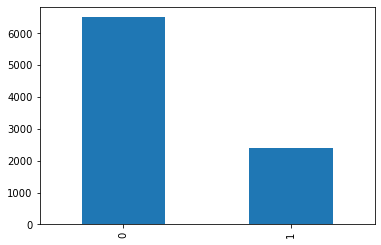

In [10]:
train_df["Label"].value_counts().plot(kind="bar")

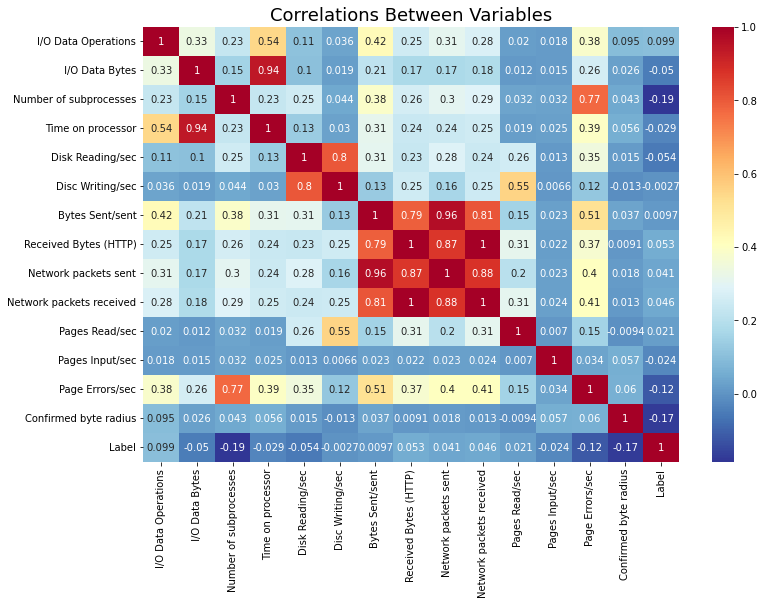

In [11]:
#correlations between the features
cm = train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cm,fmt=".2g", cmap="RdYlBu_r", annot=True)
plt.title("Correlations Between Variables", size=18)
plt.show()

In [25]:
X = train_df.drop(["ID","Label","Disc Writing/sec","Bytes Sent/sent"], axis=1)
y = train_df["Label"]
print(f"The shape of the fearure variables is {X.shape}")
print(f"The shape of the target variable is {y.shape}")

The shape of the fearure variables is (8908, 12)
The shape of the target variable is (8908,)


In [38]:
X_train = X[:7126]
X_test = X[7126:]
y_train = y[:7126]
y_test = y[7126:]

In [27]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                    stratify=y, #to account for class imbalance
 #                                                   test_size=0.3,
#                                                    random_state=0)

In [39]:
print(f"The shape of X-train {X_train.shape}")
print(f"The shape of X-test {X_test.shape}")
print(f"The shape of Y-train {y_train.shape}")
print(f"The shape of Y-test {y_test.shape}")

The shape of X-train (7126, 12)
The shape of X-test (1782, 12)
The shape of Y-train (7126,)
The shape of Y-test (1782,)


In [40]:
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)
print(etr.feature_importances_)

[0.23599358 0.11384021 0.15141121 0.08562497 0.07894128 0.04879154
 0.0378113  0.03985794 0.02536752 0.00068438 0.07738295 0.10429312]


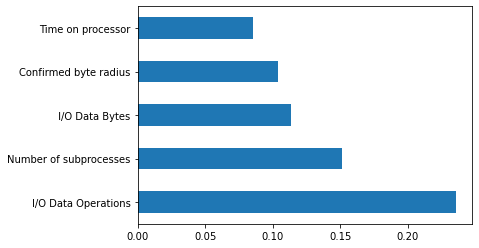

In [41]:
#show how important each of the features are
importances = pd.Series(etr.feature_importances_, index=X.columns)
importances.nlargest(5).plot(kind='barh')
plt.show()

In [42]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [85]:
model = XGBClassifier(n_estimators=1000,max_depth=7,eta=0.1,subsample=0.7,colsample_bytree=0.8)
model.fit(X_train, y_train)

C:\Users\OWNER1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [86]:
y_pred = model.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1295
           1       0.80      0.76      0.78       487

    accuracy                           0.88      1782
   macro avg       0.86      0.85      0.85      1782
weighted avg       0.88      0.88      0.88      1782



In [88]:
submission = pd.DataFrame({"ID": test_df["ID"], "Target": model.predict(test_df.drop(["ID","Disc Writing/sec","Bytes Sent/sent"], axis=1))})
submission["Target"]= submission["Target"].astype("int64")
submission.head(10)

C:\Users\OWNER1\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,1
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0
5,ID_64UNYP0YRV,0
6,ID_95RLFN8W6P,1
7,ID_U9FLCVO4L7,0
8,ID_MNP4PY97YF,0
9,ID_LVPPC2KF9A,1


In [89]:
submission.to_csv("submission.csv", index=False)